In [2]:
#import packages
import os
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
import torchvision.models as models
import glob
import shutil
import random
from tqdm import tqdm
import matplotlib.pyplot as plt

In [3]:

#Splitting the data

# Defining the path to dataset
dataset_path = '/kaggle/input/plantdisease/PlantVillage'

train_ratio = 0.75
valid_ratio = 0.10
test_ratio = 0.15

# The path to the output directory
output_path = '/kaggle/working/PVdatasetsplit/'

# Create the output directory if it doesn't exist
if not os.path.exists(output_path):
    os.makedirs(output_path)

# Defining the names of the subdirectories for each set
train_dir = 'train'
valid_dir = 'valid'
test_dir = 'test'

# Creating the subdirectories for each set
os.makedirs(os.path.join(output_path, train_dir))
os.makedirs(os.path.join(output_path, valid_dir))
os.makedirs(os.path.join(output_path, test_dir))

# Loop over each class in the dataset
classes = os.listdir(dataset_path)
for cls in classes:
    # Create the subdirectories for each class in each set
    os.makedirs(os.path.join(output_path, train_dir, cls))
    os.makedirs(os.path.join(output_path, valid_dir, cls))
    os.makedirs(os.path.join(output_path, test_dir, cls))

    # Get the list of images for this class
    images = os.listdir(os.path.join(dataset_path, cls))
    num_images = len(images)

    # Shuffle the images
    random.shuffle(images)

    # Split the images into sets
    num_train = int(train_ratio * num_images)
    num_valid = int(valid_ratio * num_images)
    num_test = int(test_ratio * num_images)

    train_images = images[:num_train]
    valid_images = images[num_train:num_train+num_valid]
    test_images = images[num_train+num_valid:]

    # Copy the images to the corresponding subdirectories for each set
    for img in train_images:
        src_path = os.path.join(dataset_path, cls, img)
        print(img)
        dst_path = os.path.join(output_path, train_dir, cls, img)
        shutil.copyfile(src_path, dst_path)

    for img in valid_images:
        src_path = os.path.join(dataset_path, cls, img)
        dst_path = os.path.join(output_path, valid_dir, cls, img)
        shutil.copyfile(src_path, dst_path)

    for img in test_images:
        src_path = os.path.join(dataset_path, cls, img)
        dst_path = os.path.join(output_path, test_dir, cls, img)
        shutil.copyfile(src_path, dst_path)

7b3f55a2-eeeb-4a88-98dd-f065ea4a777f___JR_B.Spot 3212.JPG
8289c053-a0c4-4740-9fd8-fd316b6f5688___JR_B.Spot 3299.JPG
c9e13908-bce6-4ad7-831f-a4a408cabf72___JR_B.Spot 3198.JPG
12c953a0-bd3e-45d0-aaea-5139f5d63e01___JR_B.Spot 8863.JPG
dd1be385-6753-4a84-ab24-bf4b9ede3950___NREC_B.Spot 9198.JPG
442f9778-71fb-43c6-9b97-e11f6525a0f3___JR_B.Spot 3177.JPG
532fab13-878e-4fe9-af94-302ed3e0a906___NREC_B.Spot 1885.JPG
97b1492e-13ef-44f3-aa9d-de01444499db___JR_B.Spot 3219.JPG
1b0cfb07-f452-49e0-85ad-45f3f519ca7a___JR_B.Spot 9094.JPG
718cf35c-8f3b-4d29-9c49-0aac5a8b6660___NREC_B.Spot 9098.JPG
8b50f2db-cbf2-4758-bea6-a011f0cc1497___JR_B.Spot 3235.JPG
10af9ff3-16c3-4cb0-8af0-71d3b8442206___NREC_B.Spot 9090.JPG
4c2444b0-9bf1-4672-a118-dbde778fdab0___JR_B.Spot 8937.JPG
2f9b46c7-fa77-4196-9ed1-f3f316182340___JR_B.Spot 8943.JPG
bd4af3cd-1124-4b3e-b5b9-c58ab11266b6___JR_B.Spot 9013.JPG
ae645b07-4c93-45d7-9ee6-83cbf1201e8b___NREC_B.Spot 9119.JPG
11b85334-0029-430e-873d-9402bd9e5e9f___JR_B.Spot 9031.JPG
2d55

In [4]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize the images to 224x224
    transforms.RandomHorizontalFlip(),  # Randomly flip the images horizontally
    transforms.RandomRotation(10),  # Randomly rotate the images by up to 10 degrees
    transforms.ToTensor(),  # Convert the images to PyTorch tensors
    transforms.Normalize(  # Normalize the images
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

# Load the dataset
train_dataset = ImageFolder('/kaggle/working/PVdatasetsplit/train', transform=transform)
test_dataset = ImageFolder('/kaggle/working/PVdatasetsplit/test', transform=transform)
val_dataset = ImageFolder('/kaggle/working/PVdatasetsplit/valid', transform=transform)

# Create data loaders
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=64, shuffle=False)

In [5]:
print(len(train_loader))
print(len(test_loader))
print(len(val_loader))

242
49
33


In [10]:

# Define the model architecture
model = models.shufflenet_v2_x2_0(weights=None)
model.classifier = nn.Sequential(
    nn.Linear(1280, 1024),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(1024, 512),
    nn.ReLU(),
    nn.Dropout(0.5),
    
    nn.Linear(512, 256),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(256, 15)
)




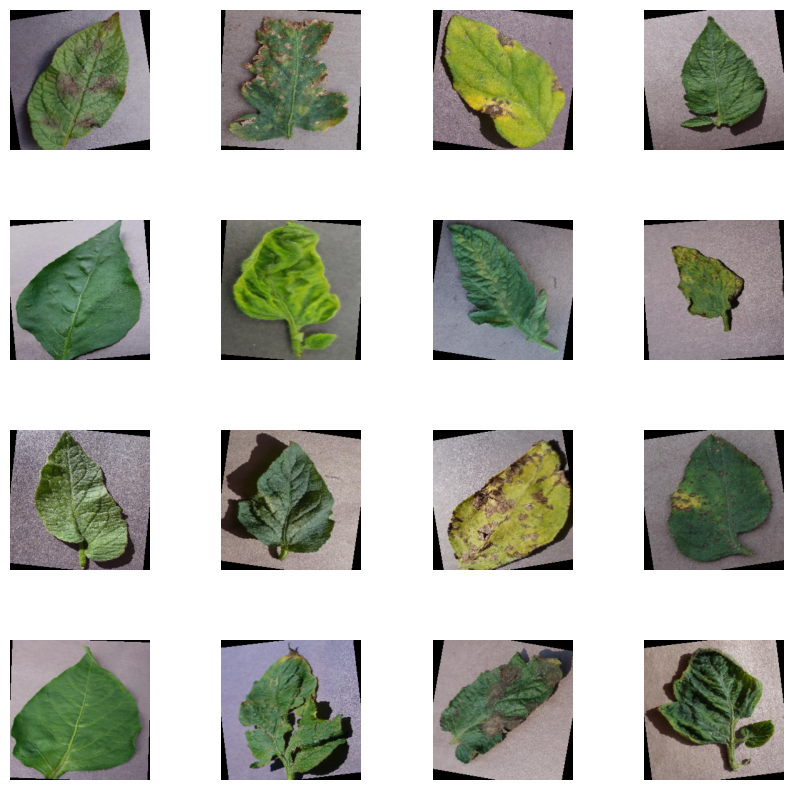

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import torch

# Get a batch of images from the train loader
images, labels = next(iter(train_loader))

# Convert the PyTorch tensor to a NumPy array
images = images.numpy()

# Convert the NumPy array to a PyTorch tensor
images = torch.from_numpy(images)

# Denormalize the images
mean = torch.tensor([0.485, 0.456, 0.406])
std = torch.tensor([0.229, 0.224, 0.225])
images = images.permute(0, 2, 3, 1)  # Change the order of the dimensions
images = std * images + mean

# Create a figure with 4x4 subplots
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 10))
fig.subplots_adjust(hspace=0.5, wspace=0.5) # Adjust subplot parameters
for i, ax in enumerate(axes.flat):
    # Display the image
    ax.imshow(images[i])
    ax.axis('off')
plt.show()




In [11]:
model.load_state_dict(torch.load("/kaggle/input/shufflenetv2model/best_model.pt"))
# Set the model to evaluation mode
model.eval()


ShuffleNetV2(
  (conv1): Sequential(
    (0): Conv2d(3, 24, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (stage2): Sequential(
    (0): InvertedResidual(
      (branch1): Sequential(
        (0): Conv2d(24, 24, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=24, bias=False)
        (1): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): Conv2d(24, 122, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (3): BatchNorm2d(122, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (4): ReLU(inplace=True)
      )
      (branch2): Sequential(
        (0): Conv2d(24, 122, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (1): BatchNorm2d(122, eps=1e-05, momentum=0.1, affine=True, track_runn

In [12]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Move model to the device
model = model.to(device)

class_names= test_dataset.classes
colors = ['#e6194B', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000']



# Extract the features from the model
features = []
labels = []
with torch.no_grad():
    for images, batch_labels in test_loader:
        images, batch_labels = images.to(device), batch_labels.to(device)
        outputs = model(images)
        features.append(outputs.cpu().detach().numpy())
        labels.append(batch_labels.cpu().numpy())
features = np.concatenate(features, axis=0)
labels = np.concatenate(labels, axis=0)

# Compute the t-SNE embeddings
tsne = TSNE(n_components=2, verbose=1, perplexity=35, n_iter=1000)
embeddings = tsne.fit_transform(features)

# Cluster the embeddings using KMeans
kmeans = KMeans(n_clusters=15, random_state=0).fit(embeddings)


/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 106 nearest neighbors...
[t-SNE] Indexed 3106 samples in 0.003s...
[t-SNE] Computed neighbors for 3106 samples in 0.517s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3106
[t-SNE] Computed conditional probabilities for sample 2000 / 3106
[t-SNE] Computed conditional probabilities for sample 3000 / 3106
[t-SNE] Computed conditional probabilities for sample 3106 / 3106
[t-SNE] Mean sigma: 10.924164
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.398941
[t-SNE] KL divergence after 1000 iterations: 0.767034


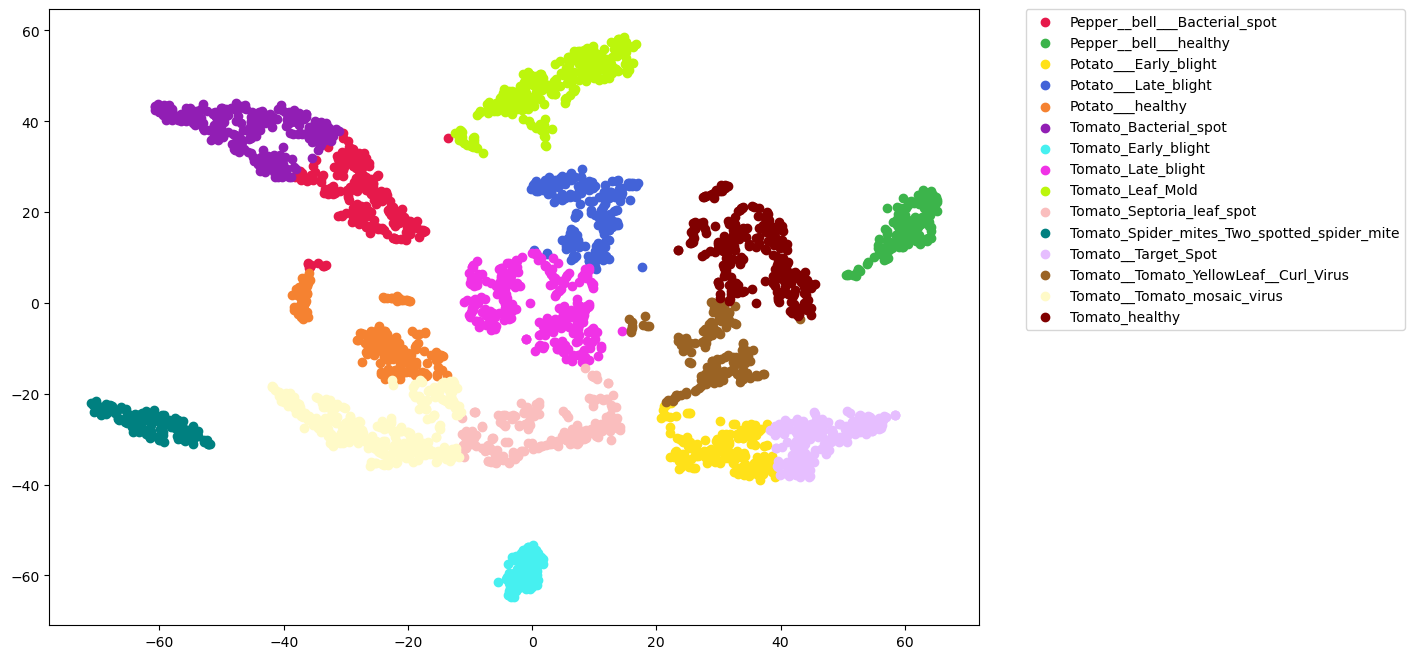

In [13]:
# Plot the t-SNE embeddings with different colors for each cluster
fig, ax = plt.subplots(figsize=(12, 8))
for i in range(15):
    indices = np.where(kmeans.labels_ == i)[0]
    ax.scatter(embeddings[indices, 0], embeddings[indices, 1], label=class_names[i], c=colors[i])
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., prop={'size': 10})
plt.show()